In [752]:
import numpy as np
from sklearn.decomposition import FastICA as ICA
import matplotlib.pyplot as plt
import math
import random

In [753]:
def generateData(slopes, samples, deviation, l, u):
    X = []
    Y = []
    data = []
    for index in range(len(slopes)):
        for i in range(samples):
            x = random.uniform(l, u)
            y = slopes[index] * x + random.uniform(-deviation, deviation)
            X.append(x)
            Y.append(y)
            data.append([x, y])
    return np.array(X), np.array(Y), np.array(data)

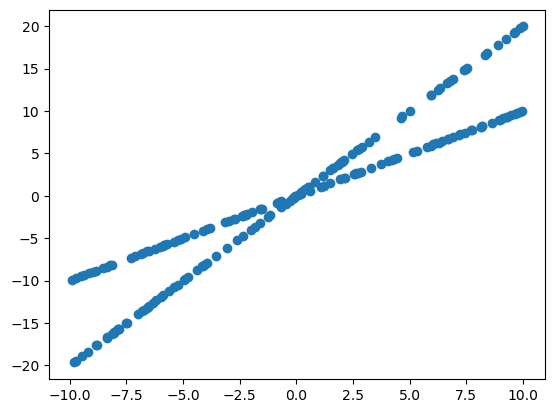

In [754]:
X, Y, data = generateData(np.array([1, 2]), 100, 0, -10, 10)
plt.scatter(X, Y)

In [755]:
def abline(slope, intercept=0):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

array([[-0.01155808, -0.00031075],
       [-0.03557841,  0.02421645]])

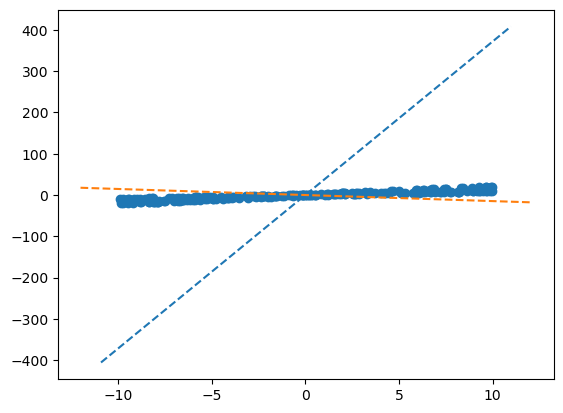

In [756]:
ica = ICA(tol=1e-5, max_iter=1000, algorithm='deflation')
S = ica.fit(data)
plt.scatter(X, Y)
abline(S.components_[0][0] / S.components_[0][1])
abline(S.components_[1][0] / S.components_[1][1])
# abline(S.components_[2][1] / S.components_[2][0])
S.components_